In [37]:
'''
Task Details
It will be interesting to see what the top songs share in common (in terms of the features which can easily be quantified). 
In this task you should use different clustering algorithms to cluster the top Spotify songs in 2019 by their numerical features (excluding popularity), 
this should be presented with an interactive visualisation and the results should be supported by a textual summary of any insights which can be drawn. 
Primarily you should be looking to discover if the songs cluster in different genres and from this can you identify the top music genres in 2019?

Expected Submission
The submission should be a notebook and should include interactive visualisations of the clustering.

Evaluation
A good solution will present one or more novel insights from performing the clustering.
'''

'\nTask Details\nIt will be interesting to see what the top songs share in common (in terms of the features which can easily be quantified). \nIn this task you should use different clustering algorithms to cluster the top Spotify songs in 2019 by their numerical features (excluding popularity), \nthis should be presented with an interactive visualisation and the results should be supported by a textual summary of any insights which can be drawn. \nPrimarily you should be looking to discover if the songs cluster in different genres and from this can you identify the top music genres in 2019?\n\nExpected Submission\nThe submission should be a notebook and should include interactive visualisations of the clustering.\n\nEvaluation\nA good solution will present one or more novel insights from performing the clustering.\n'

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram 
from sklearn.cluster import DBSCAN
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [39]:
df = pd.read_csv('top50.csv', encoding='latin1')

In [40]:
df

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [41]:
df = df.rename(columns = {'Unnamed: 0': 'id'})

In [42]:
df

,id,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [43]:
df.isnull().any()

id                  False
Track.Name          False
Artist.Name         False
Genre               False
Beats.Per.Minute    False
Energy              False
Danceability        False
Loudness..dB..      False
Liveness            False
Valence.            False
Length.             False
Acousticness..      False
Speechiness.        False
Popularity          False
dtype: bool

In [44]:
df = df.drop(['id', 'Track.Name'], axis=1)

In [45]:
df = pd.get_dummies(df)
df.shape

(50, 69)

In [46]:
df.head()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,...,Genre_electropop,Genre_escape room,Genre_latin,Genre_panamanian pop,Genre_pop,Genre_pop house,Genre_r&b en espanol,Genre_reggaeton,Genre_reggaeton flow,Genre_trap music
0,117,55,76,-6,8,75,191,4,3,79,...,0,0,0,0,0,0,0,0,0,0
1,105,81,79,-4,8,61,302,8,9,92,...,0,0,0,0,0,0,0,0,1,0
2,190,80,40,-4,16,70,186,12,46,85,...,0,0,0,0,0,0,0,0,0,0
3,93,65,64,-8,8,55,198,12,19,86,...,0,0,0,0,1,0,0,0,0,0
4,150,65,58,-4,11,18,175,45,7,94,...,0,0,0,0,0,0,0,0,0,0


(array([ 12.,  14.,   3.,   3.,   5.,   2.,   4.,   0.,   5.,   2.]),
 array([  85. ,   95.5,  106. ,  116.5,  127. ,  137.5,  148. ,  158.5,
         169. ,  179.5,  190. ]),
 <a list of 10 Patch objects>)

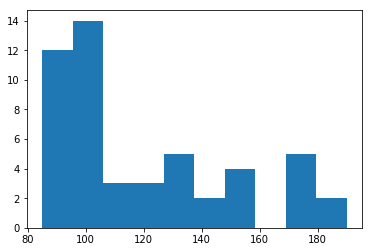

(array([  1.,   5.,   4.,   2.,   5.,   8.,   9.,   4.,  10.,   2.]),
 array([ 32. ,  37.6,  43.2,  48.8,  54.4,  60. ,  65.6,  71.2,  76.8,
         82.4,  88. ]),
 <a list of 10 Patch objects>)

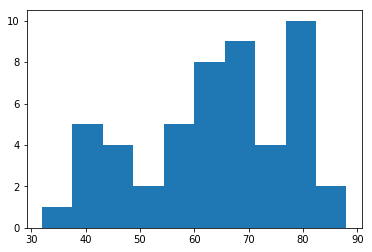

(array([  1.,   1.,   0.,   2.,   3.,   3.,  11.,  13.,  11.,   5.]),
 array([ 29. ,  35.1,  41.2,  47.3,  53.4,  59.5,  65.6,  71.7,  77.8,
         83.9,  90. ]),
 <a list of 10 Patch objects>)

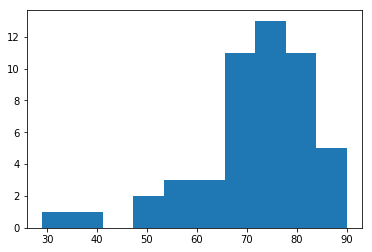

(array([  3.,   0.,   1.,   3.,   6.,  13.,   8.,  11.,   3.,   2.]),
 array([-11. , -10.1,  -9.2,  -8.3,  -7.4,  -6.5,  -5.6,  -4.7,  -3.8,
         -2.9,  -2. ]),
 <a list of 10 Patch objects>)

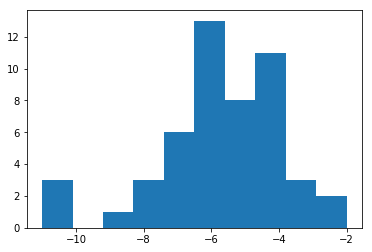

(array([ 22.,  15.,   5.,   2.,   0.,   3.,   1.,   1.,   0.,   1.]),
 array([  5. ,  10.3,  15.6,  20.9,  26.2,  31.5,  36.8,  42.1,  47.4,
         52.7,  58. ]),
 <a list of 10 Patch objects>)

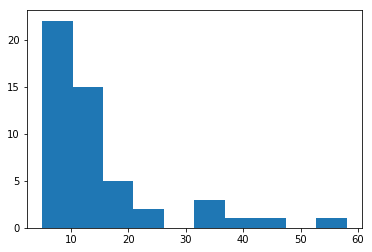

(array([  4.,   2.,   5.,   7.,   5.,   4.,  10.,   5.,   3.,   5.]),
 array([ 10. ,  18.5,  27. ,  35.5,  44. ,  52.5,  61. ,  69.5,  78. ,
         86.5,  95. ]),
 <a list of 10 Patch objects>)

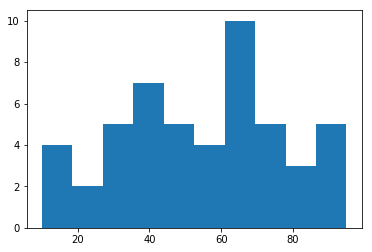

(array([  2.,   1.,   8.,  10.,  13.,   9.,   1.,   3.,   1.,   2.]),
 array([ 115. ,  134.4,  153.8,  173.2,  192.6,  212. ,  231.4,  250.8,
         270.2,  289.6,  309. ]),
 <a list of 10 Patch objects>)

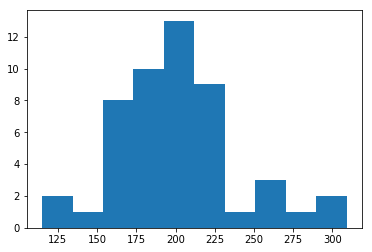

(array([ 13.,  13.,   7.,   3.,   5.,   2.,   2.,   3.,   0.,   2.]),
 array([  1. ,   8.4,  15.8,  23.2,  30.6,  38. ,  45.4,  52.8,  60.2,
         67.6,  75. ]),
 <a list of 10 Patch objects>)

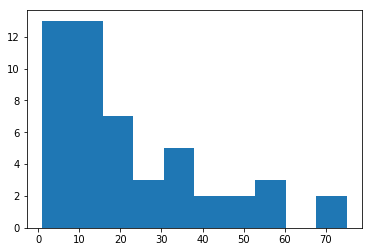

(array([ 26.,   7.,   5.,   2.,   0.,   2.,   5.,   1.,   1.,   1.]),
 array([  3. ,   7.3,  11.6,  15.9,  20.2,  24.5,  28.8,  33.1,  37.4,
         41.7,  46. ]),
 <a list of 10 Patch objects>)

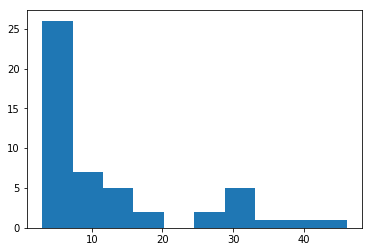

In [47]:
plt.hist(df['Beats.Per.Minute'])
plt.show()
plt.hist(df['Energy'])
plt.show()
plt.hist(df['Danceability'])
plt.show()
plt.hist(df['Loudness..dB..'])
plt.show()
plt.hist(df['Liveness'])
plt.show()
plt.hist(df['Valence.'])
plt.show()
plt.hist(df['Length.'])
plt.show()
plt.hist(df['Acousticness..'])
plt.show()
plt.hist(df['Speechiness.'])
plt.show()

In [49]:
X = df.drop(['Popularity'], axis=1)
Y = df['Popularity']
kmeans = KMeans(n_clusters=3)    
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2], dtype=int32)

In [54]:
centers = kmeans.cluster_centers_
centers

array([[  1.35750000e+02,   6.98750000e+01,   7.42500000e+01,
         -4.62500000e+00,   1.61250000e+01,   5.22500000e+01,
          2.68250000e+02,   2.07500000e+01,   1.90000000e+01,
          0.00000000e+00,   1.25000000e-01,   0.00000000e+00,
          1.25000000e-01,   0.00000000e+00,   1.25000000e-01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.25000000e-01,   1.25000000e-01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.25000000e-01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.50000000e-01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        